# ベルヌーイ分布の信頼区間計算手法の比較

Author: hagino3000  
Date: 2017-02-01

## 内容

次の3つを比較する、実装はstatsmodelsを使う

- 正規近似
- Clopper Peason (EXACT法)
- Wilson Score Interval

## Why

ネット広告のクリック率とコンバージョン率の値は正例が少なくゼロに近い値(0.005〜0.1)になる。  
この時、二項分布の正規近似では信頼区間の下界がマイナスになってしまい、計算に支障が出る。  
平均がゼロ付近にのケースに強い方式を検証したい。

## Trial = 100, Success = 3 の確率分布を見る

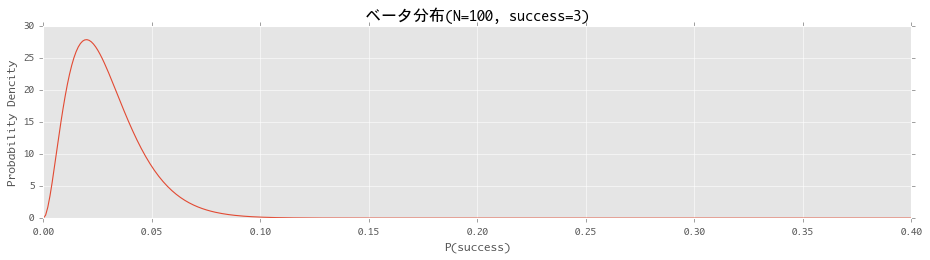

In [56]:
import scipy.stats
x = np.linspace(0, 0.4, 400)
y = scipy.stats.beta.pdf(x, 3, 100)
plt.figure(figsize=(14, 3))
plt.plot(x, y)
plt.xlim(0, 0.4)
plt.title('ベータ分布(N=100, success=3)')
plt.ylabel('Probability Dencity')
plt.xlabel('P(success)')

## statsmodelsで95%信頼区間を求める

以降 N=100, Success=3 のケースとする

In [116]:
import statsmodels.stats.proportion
statsmodels.__version__

'0.6.1'

In [8]:
print(statsmodels.stats.proportion.proportion_confint.__doc__)

confidence interval for a binomial proportion

    Parameters
    ----------
    count : int or array
        number of successes
    nobs : int
        total number of trials
    alpha : float in (0, 1)
        significance level, default 0.05
    method : string in ['normal']
        method to use for confidence interval,
        currently available methods :

         - `normal` : asymptotic normal approximation
         - `agresti_coull` : Agresti-Coull interval
         - `beta` : Clopper-Pearson interval based on Beta distribution
         - `wilson` : Wilson Score interval
         - `jeffrey` : Jeffrey's Bayesian Interval
         - `binom_test` : experimental, inversion of binom_test

    Returns
    -------
    ci_low, ci_upp : float
        lower and upper confidence level with coverage (approximately) 1-alpha.
        Note: Beta has coverage
        coverage is only 1-alpha on average for some other methods.)

    Notes
    -----
    Beta, the Clopper-Pearson interval has c

In [49]:
# 正規分布近似
statsmodels.stats.proportion.proportion_confint(3, 100, alpha=0.05, method='normal')

(-0.0034344809563718326, 0.06343448095637183)

In [44]:
# Clopper Pearson (EXACT法)
statsmodels.stats.proportion.proportion_confint(3, 100, alpha=0.05, method='beta')

(0.0062299715383063951, 0.085176052974280103)

In [124]:
# Wilson Score
statsmodels.stats.proportion.proportion_confint(3, 100, alpha=0.05, method='wilson')

(0.010254524024038911, 0.084519364290527629)

正規分布近似は負の区間が含まれるため良くない、Clopper-Pearson法とWilson Scoreではずいぶんと差がある  
他の設定で試してもClopper-Pearson法は広くでる